In [116]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import sklearn 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix ,accuracy_score,f1_score,precision_score,recall_score,classification_report

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV


In [117]:
data = pd.read_csv("C:/Users/jagan/Desktop/1W/csv/Breastcancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [118]:
data.shape

(569, 33)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [120]:
print(data.select_dtypes(include="object").columns)

len(data.select_dtypes(include="object").columns)

Index(['diagnosis'], dtype='object')


1

In [121]:
print(data.select_dtypes(include=['float','int']).columns)

len(data.select_dtypes(include=['float','int']).columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


31

In [122]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [123]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [124]:
#Unnamaed has null values
data = data.drop(columns = "Unnamed: 32")


In [125]:
data.shape

(569, 32)

In [126]:
data.isnull().values.any()

False

In [127]:
data.select_dtypes(include="object").columns

Index(['diagnosis'], dtype='object')

In [128]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [129]:
data['diagnosis'].nunique()

2

In [130]:
#we should change both M , B to numerical values 
#this Process is called ONE HOT ENCODING 
data = pd.get_dummies(data=data,drop_first=True)

In [131]:
data.head(20)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,1
5,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,1
6,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,1
7,84458202,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,1
8,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,1
9,84501001,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,1


In [132]:
#Beneign(0)
(data['diagnosis_M']==0).sum()

357

In [133]:
# Malignant(1)
(data['diagnosis_M']==1).sum()

212

C:\Users\jagan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis_M', ylabel='count'>

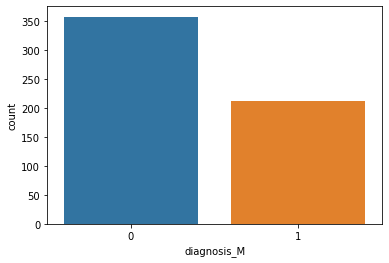

In [134]:
#lets plot them in seaborn 
sns.countplot(data['diagnosis_M'],label = 'Count')

In [135]:
#correlation matrix and headmap
data2 = data.drop(columns='diagnosis_M')
data2.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:title={'center':'Correlation with diagnosis_M'}>

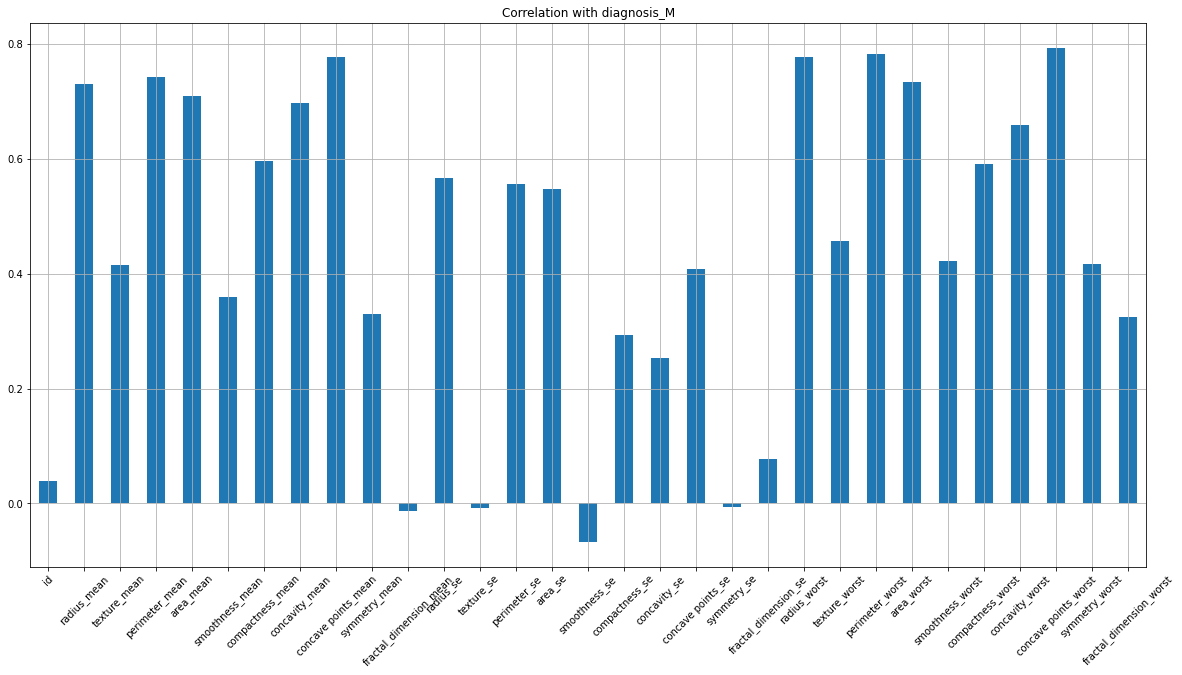

In [136]:
#Correlation graph with diagnosis_M
data2.corrwith(data['diagnosis_M']).plot.bar(
    figsize=(20,10),title="Correlation with diagnosis_M", rot = 45 , grid = True
)

In [137]:
#lets get correlation matrix
data.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


<AxesSubplot:>

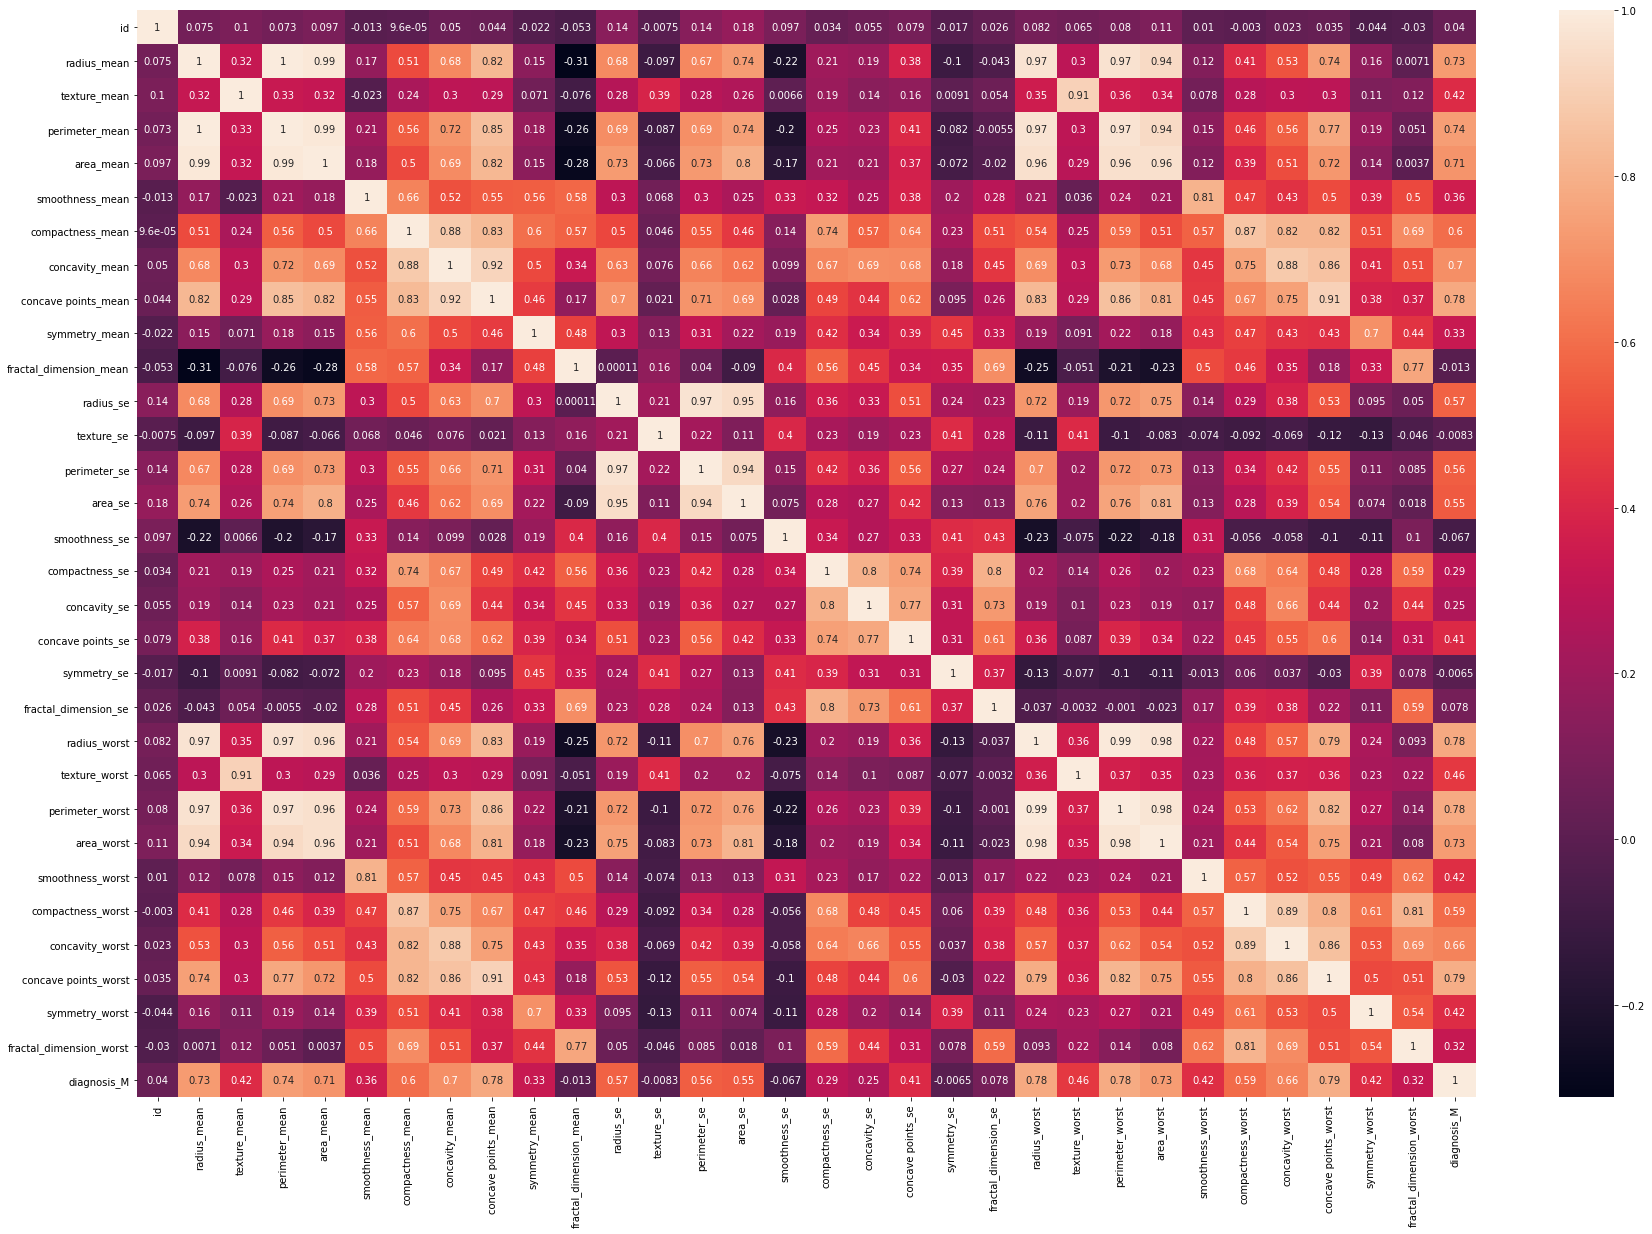

In [138]:
#seaborn heatmap
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True)

In [139]:
#splitting the data train and test set 
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [140]:
X = data.iloc[:,1:-1].values # all rows and ignored id colum and last column(diagnosis_M)

In [141]:
X.shape

(569, 30)

In [142]:
y = data.iloc[:,-1] #only selected last column
y.shape

(569,)

In [143]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [144]:
x_train.shape , y_train.shape

((455, 30), (455,))

In [145]:
x_test.shape , y_test.shape

((114, 30), (114,))

In [146]:
x_train,x_test

(array([[1.344e+01, 2.158e+01, 8.618e+01, ..., 1.112e-01, 2.994e-01,
         7.146e-02],
        [1.617e+01, 1.607e+01, 1.063e+02, ..., 1.251e-01, 3.153e-01,
         8.960e-02],
        [1.090e+01, 1.296e+01, 6.869e+01, ..., 3.953e-02, 2.738e-01,
         7.685e-02],
        ...,
        [1.169e+01, 2.444e+01, 7.637e+01, ..., 1.308e-01, 2.803e-01,
         9.970e-02],
        [1.377e+01, 2.229e+01, 9.063e+01, ..., 1.673e-01, 3.080e-01,
         9.333e-02],
        [8.671e+00, 1.445e+01, 5.442e+01, ..., 0.000e+00, 2.592e-01,
         7.848e-02]]),
 array([[1.166e+01, 1.707e+01, 7.370e+01, ..., 4.262e-02, 2.731e-01,
         6.825e-02],
        [1.553e+01, 3.356e+01, 1.037e+02, ..., 2.014e-01, 3.512e-01,
         1.204e-01],
        [1.193e+01, 2.153e+01, 7.653e+01, ..., 7.247e-02, 2.438e-01,
         8.541e-02],
        ...,
        [1.175e+01, 1.756e+01, 7.589e+01, ..., 1.010e-01, 2.478e-01,
         7.757e-02],
        [1.735e+01, 2.306e+01, 1.110e+02, ..., 8.235e-02, 2.452e-01,
   

In [147]:
#Feature scaling Standard scaler
#its used to give importance to all dara columns some may have single digit and some may have in thousands 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train,x_test


(array([[-0.21760709,  0.52416273, -0.26023892, ..., -0.08082946,
          0.14012766, -0.71004068],
        [ 0.5435909 , -0.75897728,  0.55355552, ...,  0.13107631,
          0.407503  ,  0.30263452],
        [-0.92582792, -1.48321783, -0.96765764, ..., -1.17344002,
         -0.29036344, -0.40914105],
        ...,
        [-0.70555451,  1.19018459, -0.65702438, ...,  0.21797292,
         -0.18105906,  0.86647242],
        [-0.12559414,  0.68950382, -0.08024959, ...,  0.77441614,
          0.28474577,  0.51086376],
        [-1.54733353, -1.13623441, -1.54483689, ..., -1.77607565,
         -0.5358779 , -0.31814543]]),
 array([[-0.71391933, -0.5261025 , -0.76501797, ..., -1.12633291,
         -0.30213468, -0.88924065],
        [ 0.36514155,  3.31400254,  0.44839321, ...,  1.29427131,
          1.0111995 ,  2.02206099],
        [-0.63863601,  0.51251899, -0.65055285, ..., -0.67126907,
         -0.7948452 ,  0.06872553],
        ...,
        [-0.68882489, -0.41199386, -0.67643895, ..., -

In [148]:
#Building model 1
#LogisticRegresssion
classifier_LR = LogisticRegression(random_state=0)
classifier_LR.fit(x_train,y_train)


LogisticRegression(random_state=0)

In [149]:
y_pred = classifier_LR.predict(x_test)
acc = accuracy_score(y_test,y_pred)
precision_s = precision_score(y_test,y_pred)
recall_s = recall_score(y_test,y_pred)
f1_s = f1_score(y_test,y_pred)

In [150]:
results = pd.DataFrame([['LogistiRegression',acc,f1_s,precision_s,recall_s]],
columns= ['model','Accuracy','F1_Score','Precision_score','recall_score'])

results


,model,Accuracy,F1_Score,Precision_score,recall_score
0,LogistiRegression,0.982456,0.974359,1.0,0.95


In [151]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.95      0.97        40

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



In [152]:
#confusion_matix 
cs = confusion_matrix(y_test,y_pred)
cs

array([[74,  0],
       [ 2, 38]], dtype=int64)

In [153]:
accuracies = cross_val_score(estimator=classifier_LR, X=x_train, y=y_train, cv=10)

In [154]:
print(f"Accuracyis {accuracies.mean()*100}")
print(f"Standard Deviation {accuracies.std()*100}")

Accuracyis 97.57487922705315
Standard Deviation 2.303674234893675


In [155]:
#Building Model 2
#Random forest
classifier_RF = RandomForestClassifier(random_state=0)
classifier_RF.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [156]:
y_pred = classifier_RF.predict(x_test)

In [157]:
print(classification_report(y_test,y_pred))
print("accuracy is ",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.93      0.96        40

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

accuracy is  0.9736842105263158


In [158]:
print(confusion_matrix(y_test,y_pred))

[[74  0]
 [ 3 37]]


In [159]:
#crossvalidation
accuracies = cross_val_score(estimator=classifier_RF,X=x_train, y=y_train, cv = 10)

print("mean Accuracy:",(accuracies.mean()*100))
print("Standard deviation" , (accuracies.std()*100))

mean Accuracy: 95.6086956521739
Standard deviation 3.085096171190332


In [160]:
#Hyperparameter tuning 
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'C':[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
              }


In [161]:
random_search = RandomizedSearchCV(estimator=classifier_LR, param_distributions=parameters, n_iter=5, 
                                   scoring='roc_auc', n_jobs = -1, cv=5, verbose=3,refit=True)

In [162]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
C:\Users\jagan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.99382658 0.99392747 0.99423706        nan 0.98396348]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [163]:
random_search.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.75}

In [164]:
random_search.best_estimator_

LogisticRegression(C=0.75, random_state=0, solver='newton-cg')

In [165]:
#final model(Logistic regression)
#we should take the above parameters
clf = LogisticRegression(C=0.5, random_state=0, solver='liblinear',penalty='l2')
clf.fit(x_train,y_train)

LogisticRegression(C=0.5, random_state=0, solver='liblinear')

In [166]:
y_pred = clf.predict(x_test)

In [167]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.95      0.97        40

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



In [168]:
#Cross validation
print("Final model")
accuracies = cross_val_score(estimator= clf,X= x_train,y= y_train, cv=10)
print("mean Accuracy:",(accuracies.mean()*100))
print("Standard deviation" , (accuracies.std()*100))

print("Randomforest model ")
accuracies = cross_val_score(estimator= classifier_RF,X= x_train,y= y_train, cv=10)
print("mean Accuracy:",(accuracies.mean()*100))
print("Standard deviation" , (accuracies.std()*100))

print("Logistic model")
accuracies = cross_val_score(estimator= classifier_LR,X= x_train,y= y_train, cv=10)
print("mean Accuracy:",(accuracies.mean()*100))
print("Standard deviation" , (accuracies.std()*100))


Final model
mean Accuracy: 98.2415458937198
Standard deviation 2.1538743641496056
Randomforest model 
mean Accuracy: 95.6086956521739
Standard deviation 3.085096171190332
Logistic model
mean Accuracy: 97.57487922705315
Standard deviation 2.303674234893675


In [169]:
##Predicting a single observation
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [171]:
# we should store the single observation data array
single_observation =[[17.99, 10.38, 122.80, 1001.0, 0.11840, 0.27760,	0.3001,	0.14710, 0.2419, 0.07871, 1.0950, 0.9053, 8.589, 153.40, 0.006399, 0.04904,	0.05373, 0.01587, 0.03003, 0.006193, 25.38,
17.33, 184.60, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.11890]]

In [172]:
single_observation

[[17.99,
  10.38,
  122.8,
  1001.0,
  0.1184,
  0.2776,
  0.3001,
  0.1471,
  0.2419,
  0.07871,
  1.095,
  0.9053,
  8.589,
  153.4,
  0.006399,
  0.04904,
  0.05373,
  0.01587,
  0.03003,
  0.006193,
  25.38,
  17.33,
  184.6,
  2019.0,
  0.1622,
  0.6656,
  0.7119,
  0.2654,
  0.4601,
  0.1189]]

In [173]:
clf.predict(sc.transform(single_observation))

array([1], dtype=uint8)

In [177]:
single_obs =[[20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678]]

In [178]:
single_obs

[[20.29,
  14.34,
  135.1,
  1297.0,
  0.1003,
  0.1328,
  0.198,
  0.1043,
  0.1809,
  0.05883,
  0.7572,
  0.7813,
  5.438,
  94.44,
  0.01149,
  0.02461,
  0.05688,
  0.01885,
  0.01756,
  0.005115,
  22.54,
  16.67,
  152.2,
  1575.0,
  0.1374,
  0.205,
  0.4,
  0.1625,
  0.2364,
  0.07678]]

In [179]:
clf.predict(sc.transform(single_obs))

array([1], dtype=uint8)